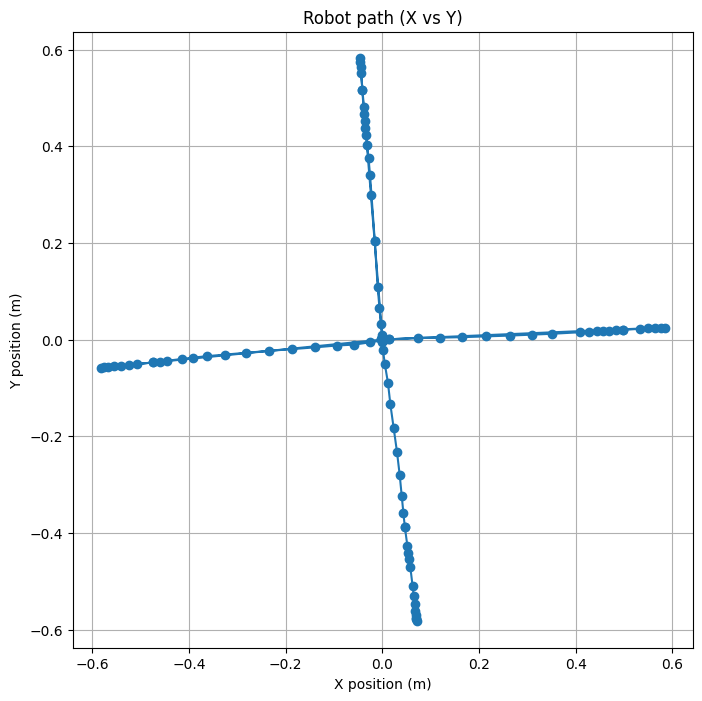

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("./robot_log_15_55_34_P1-6_I0-3_D3.csv")

# แปลง timestamp ให้อ่านง่าย (เป็นวินาทีเริ่มต้น)
start_time = df['time'].iloc[0]
df['time_sec'] = df['time'] - start_time

# Plot 1: กราฟ XY แสดงเส้นทางหุ่น (ตำแหน่ง x,y)
plt.figure(figsize=(8,8))
plt.plot(df['x'], df['y'], marker='o')
plt.title('Robot path (X vs Y)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')  # ทำให้สเกล x,y เท่ากันเพื่อดูรูปทรง
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_24228\607088054.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


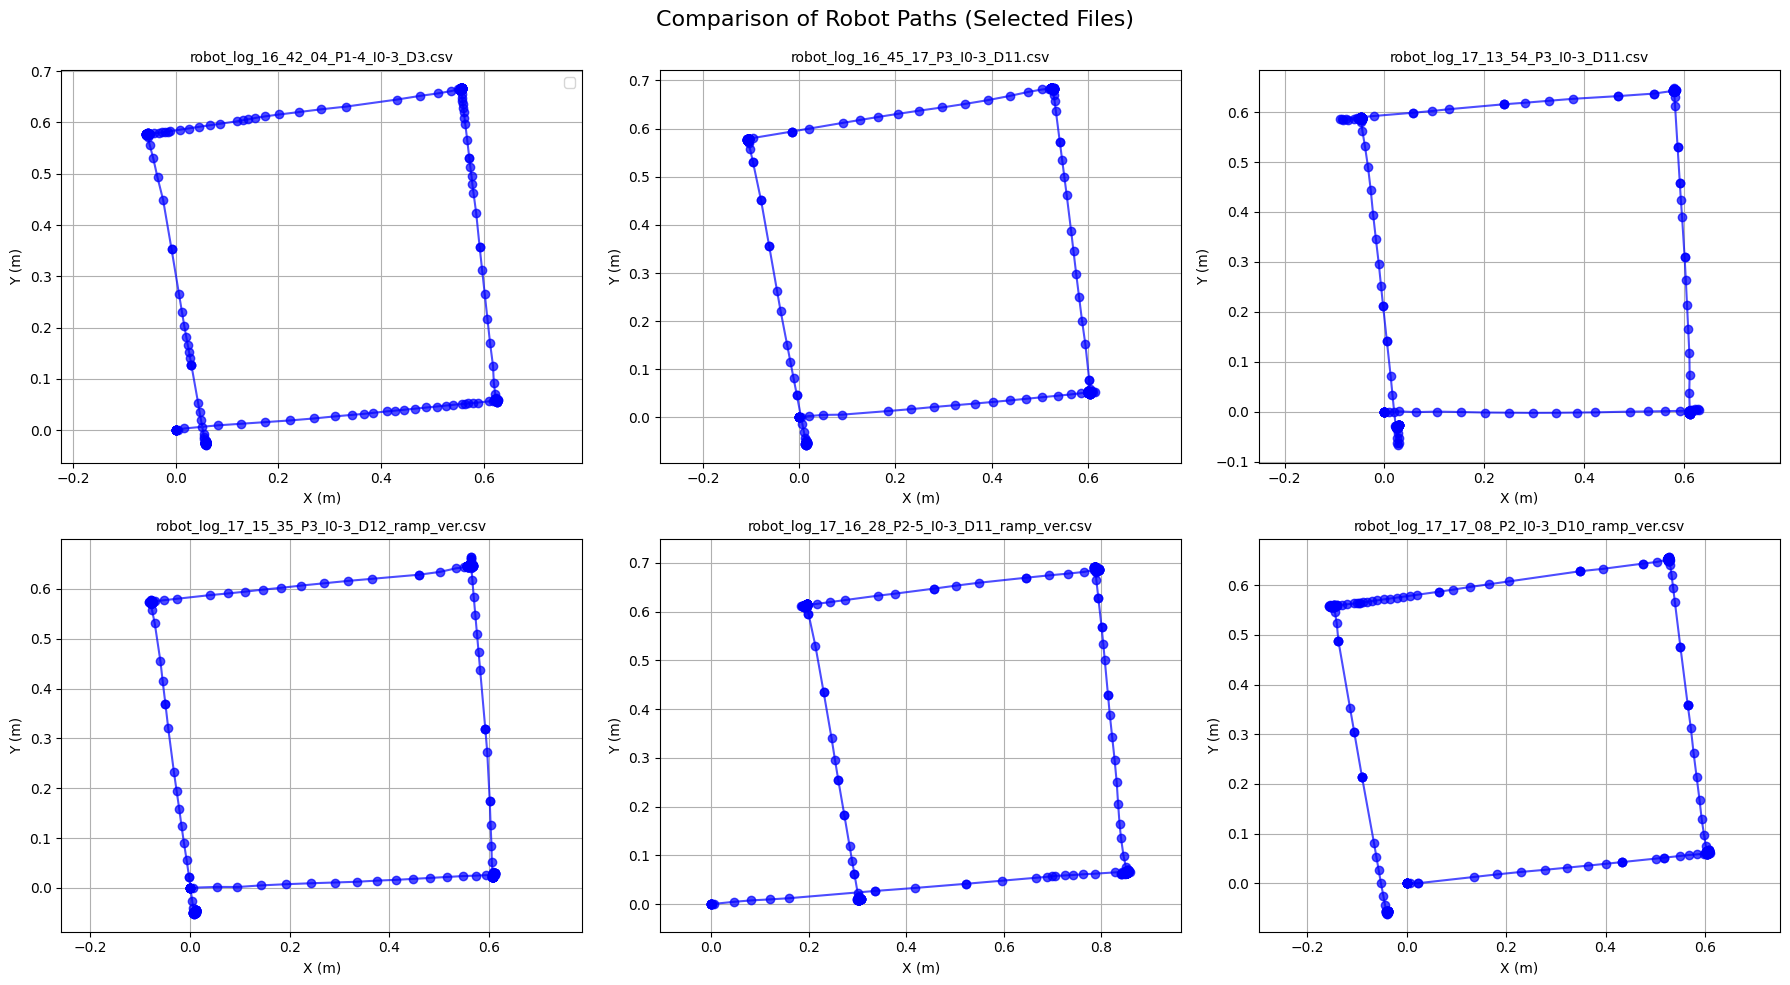

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# รายชื่อไฟล์ที่เลือกมา 6 ไฟล์
filenames = [
    "robot_log_16_42_04_P1-4_I0-3_D3.csv",
    "robot_log_16_45_17_P3_I0-3_D11.csv",
    "robot_log_17_13_54_P3_I0-3_D11.csv",
    "robot_log_17_15_35_P3_I0-3_D12_ramp_ver.csv",
    "robot_log_17_16_28_P2-5_I0-3_D11_ramp_ver.csv",
    "robot_log_17_17_08_P2_I0-3_D10_ramp_ver.csv"
]

# สร้าง subplot แบบ 2 แถว 3 คอลัมน์
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # ทำให้ง่ายต่อการใช้ index

for i, filename in enumerate(filenames):
    try:
        df = pd.read_csv(filename)
        x = df['x'].values
        y = df['y'].values

        ax = axes[i]
        ax.plot(x, y, marker='o', linestyle='-', color='blue', alpha=0.7)
        ax.set_title(filename, fontsize=10)
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Y (m)")
        ax.grid(True)
        ax.axis('equal')

        if i == 0:
            ax.legend()
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        continue

# ลบ subplot ที่ไม่ถูกใช้ (ถ้ามีเหลือ)
for j in range(len(filenames), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Comparison of Robot Paths", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # ขยับหัวตารางลงนิด
plt.show()
